In [ ]:
%load_ext autoreload
%autoreload 2

import os
os.environ["HF_HOME"] = "../tmp_saves/hg_cache"

import nltk
import csv
import matplotlib.pyplot as plt
from tqdm import tqdm
from datasets import load_dataset

In [2]:
def show_word_lens_hist(word_lens):
    plt.hist(word_lens, bins=100, cumulative=True, histtype="step", density=True)
    plt.title("Word length histogram")
    plt.xlabel("Word length")
    plt.ylabel("Cumulative probability")
    plt.show()

## Twitter

In [4]:
dataset = load_dataset("sentiment140")
dataset

Generating test split: 100%|██████████| 498/498 [00:00<00:00, 34403.32 examples/s]


DatasetDict({
    train: Dataset({
        features: ['text', 'date', 'user', 'sentiment', 'query'],
        num_rows: 1600000
    })
    test: Dataset({
        features: ['text', 'date', 'user', 'sentiment', 'query'],
        num_rows: 498
    })
})

In [5]:
dataset["train"][0]

{'text': "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 'date': 'Mon Apr 06 22:19:45 PDT 2009',
 'user': '_TheSpecialOne_',
 'sentiment': 0,
 'query': 'NO_QUERY'}

  0%|          | 0/1600000 [00:00<?, ?it/s]

100%|██████████| 1600000/1600000 [04:36<00:00, 5789.30it/s]


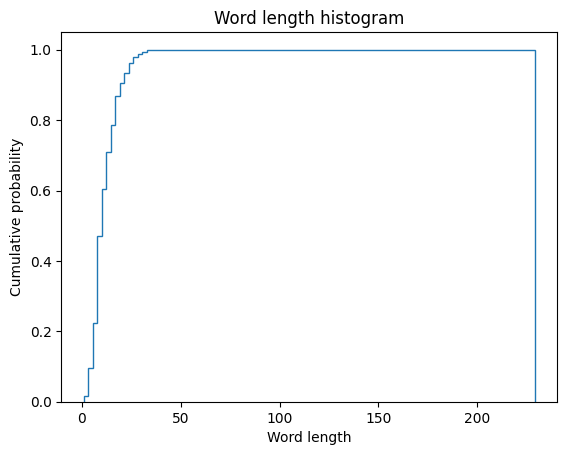

In [7]:
n_sents = 0
SENT_LEN_THRES = 32
SENT_LEN_MIN_THRES = 16
all_word_lens = list()
with open("twitter.csv", "w") as fp:
    writer = csv.DictWriter(fp, fieldnames=["sentence_id", "plaintext"])
    writer.writeheader()
    for example in tqdm(dataset["train"]):
        text = example["text"]
        sents = nltk.sent_tokenize(text)
        sents_buf = ""
        for sent_idx, sent in enumerate(sents):
            sents_buf += sent + " "
            sents_buf = sents_buf.strip()
            if len(sents_buf) >= SENT_LEN_THRES:
                writer.writerow({"sentence_id": n_sents, "plaintext": sents_buf})
                all_word_lens.append(len(nltk.word_tokenize(sents_buf)))
                sents_buf = ""
                n_sents += 1
        if len(sents_buf) >= SENT_LEN_MIN_THRES:
            writer.writerow({"sentence_id": n_sents, "plaintext": sents_buf})
            all_word_lens.append(len(nltk.word_tokenize(sents_buf)))
            n_sents += 1

show_word_lens_hist(all_word_lens)